# Topic modeling
- LSA
- PLSA
- LDA

Inspired by :https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05

## LSA
Latent Semantic Analysis (LSA) is a framework for analyzing text using matrices,Find relationships between documents and terms within documents,Used for document classification, clustering, text search, and more

In [0]:
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,
module="pandas", lineno=570)

In [0]:
!pip install -U gensim

     |████████████████████████████████| 24.2MB 1.3MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [0]:
example = ["Machine learning is super fun",
"Python is super, super cool",
"Statistics is cool, too",
"Data science is fun",
"Python is great for machine learning",
"I like football",
"Football is great to watch"]

In [0]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example)
pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names
()).head(10)

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,0,0,0,1,0,1,0,1,0,0,0,1,0
"Python is super, super cool",1,0,0,0,0,0,0,0,1,0,0,2,0
"Statistics is cool, too",1,0,0,0,0,0,0,0,0,0,1,0,0
Data science is fun,0,1,0,1,0,0,0,0,0,1,0,0,0
Python is great for machine learning,0,0,0,0,1,1,0,1,1,0,0,0,0
I like football,0,0,1,0,0,0,1,0,0,0,0,0,0
Football is great to watch,0,0,1,0,1,0,0,0,0,0,0,0,1


In [0]:
vectorizer.get_feature_names()

['cool',
 'data',
 'football',
 'fun',
 'great',
 'learning',
 'like',
 'machine',
 'python',
 'science',
 'statistics',
 'super',
 'watch']

In [0]:
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2, algorithm = 'randomized')
dtm.asfptype()
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [0]:
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns =
vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
component_1,0.280004,0.035353,0.033417,0.223993,0.178307,0.338085,0.004555,0.338085,0.391281,0.035353,0.038169,0.672310,0.028861
component_2,0.365270,-0.064548,-0.298349,-0.168056,-0.478428,-0.366379,-0.082792,-0.366379,0.001036,-0.064548,0.101363,0.424306,-0.215557


In [0]:
pd.DataFrame(dtm_lsa, index = example, columns = ["component_1","component_2"
])

,component_1,component_2
Machine learning is super fun,0.957024,-0.290007
"Python is super, super cool",0.856484,0.516174
"Statistics is cool, too",0.563355,0.826215
Data science is fun,0.704171,-0.710030
Python is great for machine learning,0.717284,-0.696781
I like football,0.099136,-0.995074
Football is great to watch,0.235618,-0.971846


In [0]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

([0.9570243939303804,
  0.8564837097375545,
  0.563354891556389,
  0.7041710879980201,
  0.717283903455172,
  0.0991363884263417,
  0.2356183104704531],
 [-0.29000742994307604,
  0.5161740549022165,
  0.8262150241671288,
  -0.7100303365544915,
  -0.6967810286195452,
  -0.9950738547915836,
  -0.9718456728159307])

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Plot of points against LSA principal components')

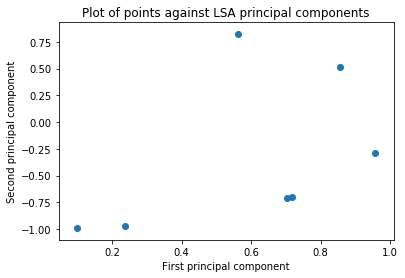

In [0]:
 # Plot scatter plot of points
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')

Populating the interactive namespace from numpy and matplotlib


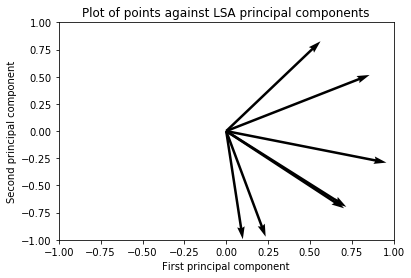

In [0]:
# Geometric picture
# Plot scatter plot of points with vectors
%pylab inline
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
plt.draw()
plt.show()

## Document similarity using LSA

In [0]:
# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=example, columns=example).head(10)

,Machine learning is super fun,"Python is super, super cool","Statistics is cool, too",Data science is fun,Python is great for machine learning,I like football,Football is great to watch
Machine learning is super fun,1.000000,0.669981,0.299536,0.879823,0.888530,0.383455,0.507335
"Python is super, super cool",0.669981,1.000000,0.908975,0.236612,0.254682,-0.428723,-0.299838
"Statistics is cool, too",0.299536,0.908975,1.000000,-0.189940,-0.171606,-0.766296,-0.670217
Data science is fun,0.879823,0.236612,-0.189940,1.000000,0.999826,0.776342,0.855956
Python is great for machine learning,0.888530,0.254682,-0.171606,0.999826,1.000000,0.764458,0.846169
I like football,0.383455,-0.428723,-0.766296,0.776342,0.764458,1.000000,0.990417
Football is great to watch,0.507335,-0.299838,-0.670217,0.855956,0.846169,0.990417,1.000000


In [0]:
# another way to do this 

# raw documents to tf-idf matrix: 
vectorizer = TfidfVectorizer(stop_words='english', 
                             use_idf=True, 
                             smooth_idf=True)
# SVD to reduce dimensionality: 
svd_model = TruncatedSVD(n_components=5,
                         algorithm='randomized',
                         n_iter=10)
# pipeline of tf-idf + SVD, fit to and applied to documents:
svd_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])
svd_matrix = svd_transformer.fit_transform(example)

# svd_matrix can later be used to compare documents, compare words, or compare queries with documents




In [0]:
np.shape(svd_matrix)

(7, 5)

## LSA is quick and efficient to use, but it does have a few primary drawbacks:

- lack of interpretable embeddings (we don’t know what the topics are, and the components may be arbitrarily positive/negative)
- need for really large set of documents and vocabulary to get accurate results
- less efficient representation


 ## Probabilistic Latent Semantic Analysis
 pLSA, or Probabilistic Latent Semantic Analysis, uses a probabilistic method instead of SVD to tackle the problem. The core idea is to find a probabilistic model with latent topics that can generate the data we observe in our document-term matrix. In particular, we want a model P(D,W) such that for any document d and word w, P(d,w) corresponds to that entry in the document-term matrix.

$P(D,W) = \sum P(Z)P(D|Z)P(Q|Z)$ refer to :  
$A \approx U_t S_t V_t^T$   
$ P(z) for S_t $ $ P(D|Z) for U_t $ $ P(Q|Z) for V_t^T $  
where the probability of our topic P(Z) corresponds to the diagonal matrix of our singular topic probabilities, the probability of our document given the topic P(D|Z) corresponds to our document-topic matrix U, and the probability of our word given the topic P(W|Z) corresponds to our term-topic matrix V.

### but still has a few problems. In particular:

- Because we have no parameters to model P(D), we don’t know how to assign probabilities to new documents
- The number of parameters for pLSA grows linearly with the number of documents we have, so it is prone to overfitting

### We will not look at any code for pLSA because it is rarely used on its own. In general, when people are looking for a topic model beyond the baseline performance LSA gives, they turn to LDA. LDA, the most common type of topic model, extends PLSA to address these issues.

## LDA
LDA stands for Latent Dirichlet Allocation. LDA is a Bayesian version of pLSA. In particular, it uses dirichlet priors for the document-topic and word-topic distributions, lending itself to better generalization.

$ {\displaystyle {\begin{aligned}{\boldsymbol {\varphi }}_{k=1\dots K}&\sim \operatorname {Dirichlet} _{V}({\boldsymbol {\beta }})\\{\boldsymbol {\theta }}_{d=1\dots M}&\sim \operatorname {Dirichlet} _{K}({\boldsymbol {\alpha }})\\z_{d=1\dots M,w=1\dots N_{d}}&\sim \operatorname {Categorical} _{K}({\boldsymbol {\theta }}_{d})\\w_{d=1\dots M,w=1\dots N_{d}}&\sim \operatorname {Categorical} _{V}({\boldsymbol {\varphi }}_{z_{dw}})\end{aligned}}} $  
${\boldsymbol {\varphi }}_{k=1\dots K} $ distribution of words in topic k  
${\boldsymbol {\theta }}_{d=1\dots M} $ distribution of topics in document d


https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
data = pd.read_csv('gdrive/My Drive/data/abcnews/abcnews-date-text.csv', error_bad_lines=False);
data_text = data[['headline_text']]
data_text['index'] = data_text.index
documents = data_text

In [41]:
documents.head()

,headline_text,index
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,1
2,a g calls for infrastructure protection summit,2
3,air nz staff in aust strike for pay rise,3
4,air nz strike to affect australian travellers,4


In [42]:
len(documents)

1103663

- Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
- Words that have fewer than 3 characters are removed.
- All stopwords are removed.
- Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
- Words are stemmed — words are reduced to their root form.

In [43]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


In [0]:
#Write a function to perform lemmatize and stem preprocessing steps on the data set.
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [46]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['rain', 'helps', 'dampen', 'bushfires']


 tokenized and lemmatized document: 
['rain', 'help', 'dampen', 'bushfir']


In [47]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:10]

0            [decid, communiti, broadcast, licenc]
1                               [wit, awar, defam]
2           [call, infrastructur, protect, summit]
3                      [staff, aust, strike, rise]
4             [strike, affect, australian, travel]
5               [ambiti, olsson, win, tripl, jump]
6           [antic, delight, record, break, barca]
7    [aussi, qualifi, stosur, wast, memphi, match]
8            [aust, address, secur, council, iraq]
9                         [australia, lock, timet]
Name: headline_text, dtype: object

### Bag of Words on the Data set
Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [48]:


dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 broadcast
1 communiti
2 decid
3 licenc
4 awar
5 defam
6 wit
7 call
8 infrastructur
9 protect
10 summit


In [34]:
print(dictionary)

Dictionary(62240 unique tokens: ['broadcast', 'communiti', 'decid', 'licenc', 'awar']...)


### Filter out tokens that appear in

- less than 15 documents (absolute number) or
- more than 0.5 documents (fraction of total corpus size, not absolute number).
- after the above two steps, keep only the first 100000 most frequent tokens.

In [0]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

### Gensim doc2bow

For each document we create a dictionary reporting how many
words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

In [50]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(76, 1), (112, 1), (483, 1), (4014, 1)]

In [37]:
processed_docs[4310]

['rain', 'help', 'dampen', 'bushfir']

### TF-IDF
Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [51]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)


corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break


[(0, 0.5892908867507543),
 (1, 0.38929654337861147),
 (2, 0.4964985175717023),
 (3, 0.5046520327464028)]


### Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, 
                                       id2word=dictionary, passes=2, workers=4)

For each topic, we will explore the words occuring in that topic and 
its relative weight.

In [53]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.024*"elect" + 0.018*"say" + 0.013*"labor" + 0.013*"tasmanian" + 0.012*"deal" + 0.011*"talk" + 0.011*"china" + 0.010*"turnbul" + 0.010*"vote" + 0.009*"releas"
Topic: 1 
Words: 0.033*"australian" + 0.020*"plan" + 0.016*"coast" + 0.016*"chang" + 0.015*"health" + 0.013*"state" + 0.013*"water" + 0.012*"help" + 0.011*"fund" + 0.011*"servic"
Topic: 2 
Words: 0.021*"market" + 0.021*"countri" + 0.018*"hour" + 0.016*"rise" + 0.014*"price" + 0.014*"share" + 0.013*"hous" + 0.010*"bank" + 0.010*"canberra" + 0.009*"get"
Topic: 3 
Words: 0.065*"polic" + 0.030*"interview" + 0.025*"crash" + 0.019*"miss" + 0.017*"shoot" + 0.016*"arrest" + 0.015*"investig" + 0.013*"driver" + 0.012*"search" + 0.011*"offic"
Topic: 4 
Words: 0.034*"charg" + 0.031*"court" + 0.023*"murder" + 0.021*"face" + 0.020*"woman" + 0.017*"jail" + 0.016*"accus" + 0.014*"die" + 0.014*"death" + 0.014*"child"
Topic: 5 
Words: 0.020*"world" + 0.016*"melbourn" + 0.015*"sydney" + 0.014*"final" + 0.012*"australia" + 0.012*"o

### Running LDA using TF-IDF

In [54]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10,
                                             id2word=dictionary,
                                             passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.024*"trump" + 0.008*"marriag" + 0.007*"peter" + 0.006*"climat" + 0.006*"quiz" + 0.005*"drink" + 0.005*"drive" + 0.004*"bendigo" + 0.004*"footbal" + 0.004*"februari"
Topic: 1 Word: 0.011*"interview" + 0.008*"grandstand" + 0.006*"australian" + 0.006*"domest" + 0.006*"stori" + 0.006*"violenc" + 0.005*"andrew" + 0.005*"world" + 0.005*"dollar" + 0.005*"australia"
Topic: 2 Word: 0.020*"rural" + 0.013*"news" + 0.008*"farmer" + 0.007*"farm" + 0.006*"nation" + 0.006*"northern" + 0.006*"cattl" + 0.006*"dairi" + 0.005*"rain" + 0.005*"drought"
Topic: 3 Word: 0.007*"energi" + 0.006*"tuesday" + 0.006*"malcolm" + 0.006*"decemb" + 0.005*"outback" + 0.005*"jam" + 0.005*"know" + 0.005*"blog" + 0.004*"georg" + 0.004*"solar"
Topic: 4 Word: 0.010*"weather" + 0.007*"michael" + 0.006*"septemb" + 0.006*"wednesday" + 0.005*"june" + 0.005*"rate" + 0.005*"price" + 0.005*"wrap" + 0.005*"scott" + 0.005*"wild"
Topic: 5 Word: 0.009*"royal" + 0.008*"leagu" + 0.007*"australia" + 0.007*"final" + 0.006*

### Performance evaluation by classifying sample document using LDA Bag of Words model

In [55]:
processed_docs[4310]

['rain', 'help', 'dampen', 'bushfir']

In [56]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.4248606264591217	 
Topic: 0.025*"kill" + 0.025*"south" + 0.020*"north" + 0.016*"west" + 0.014*"fall" + 0.013*"australia" + 0.011*"attack" + 0.008*"east" + 0.008*"korea" + 0.007*"shark"

Score: 0.22001583874225616	 
Topic: 0.020*"world" + 0.016*"melbourn" + 0.015*"sydney" + 0.014*"final" + 0.012*"australia" + 0.012*"open" + 0.011*"win" + 0.009*"leagu" + 0.009*"adelaid" + 0.009*"donald"

Score: 0.2151196300983429	 
Topic: 0.033*"australian" + 0.020*"plan" + 0.016*"coast" + 0.016*"chang" + 0.015*"health" + 0.013*"state" + 0.013*"water" + 0.012*"help" + 0.011*"fund" + 0.011*"servic"

Score: 0.02000134252011776	 
Topic: 0.065*"polic" + 0.030*"interview" + 0.025*"crash" + 0.019*"miss" + 0.017*"shoot" + 0.016*"arrest" + 0.015*"investig" + 0.013*"driver" + 0.012*"search" + 0.011*"offic"

Score: 0.020001258701086044	 
Topic: 0.021*"market" + 0.021*"countri" + 0.018*"hour" + 0.016*"rise" + 0.014*"price" + 0.014*"share" + 0.013*"hous" + 0.010*"bank" + 0.010*"canberra" + 0.009*"get"

Sco

Our test document has the highest probability to be part of the topic that our model assigned, which is the accurate classification.



###  Performance evaluation by classifying sample document using LDA TF-IDF model.

In [57]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8199764490127563	 
Topic: 0.020*"rural" + 0.013*"news" + 0.008*"farmer" + 0.007*"farm" + 0.006*"nation" + 0.006*"northern" + 0.006*"cattl" + 0.006*"dairi" + 0.005*"rain" + 0.005*"drought"

Score: 0.02001020684838295	 
Topic: 0.009*"royal" + 0.008*"leagu" + 0.007*"australia" + 0.007*"final" + 0.006*"rugbi" + 0.006*"friday" + 0.006*"cricket" + 0.006*"queensland" + 0.005*"commiss" + 0.005*"world"

Score: 0.02000400796532631	 
Topic: 0.011*"govern" + 0.008*"health" + 0.008*"fund" + 0.006*"budget" + 0.006*"plan" + 0.006*"council" + 0.005*"sport" + 0.005*"busi" + 0.005*"servic" + 0.005*"school"

Score: 0.020003506913781166	 
Topic: 0.007*"energi" + 0.006*"tuesday" + 0.006*"malcolm" + 0.006*"decemb" + 0.005*"outback" + 0.005*"jam" + 0.005*"know" + 0.005*"blog" + 0.004*"georg" + 0.004*"solar"

Score: 0.020001526921987534	 
Topic: 0.012*"drum" + 0.012*"donald" + 0.007*"novemb" + 0.007*"ash" + 0.007*"monday" + 0.007*"asylum" + 0.006*"hobart" + 0.006*"seeker" + 0.005*"updat" + 0.005*"hu

### Testing model on unseen document

In [58]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.3072778582572937	 Topic: 0.026*"queensland" + 0.025*"trump" + 0.014*"leav" + 0.013*"australia" + 0.010*"game"
Score: 0.22605407238006592	 Topic: 0.024*"elect" + 0.018*"say" + 0.013*"labor" + 0.013*"tasmanian" + 0.012*"deal"
Score: 0.18333333730697632	 Topic: 0.021*"market" + 0.021*"countri" + 0.018*"hour" + 0.016*"rise" + 0.014*"price"
Score: 0.18333332240581512	 Topic: 0.065*"polic" + 0.030*"interview" + 0.025*"crash" + 0.019*"miss" + 0.017*"shoot"
Score: 0.01666790060698986	 Topic: 0.033*"australian" + 0.020*"plan" + 0.016*"coast" + 0.016*"chang" + 0.015*"health"
Score: 0.016666864976286888	 Topic: 0.034*"govern" + 0.024*"rural" + 0.014*"break" + 0.014*"news" + 0.014*"test"
Score: 0.01666666753590107	 Topic: 0.034*"charg" + 0.031*"court" + 0.023*"murder" + 0.021*"face" + 0.020*"woman"
Score: 0.01666666753590107	 Topic: 0.020*"world" + 0.016*"melbourn" + 0.015*"sydney" + 0.014*"final" + 0.012*"australia"
Score: 0.01666666753590107	 Topic: 0.025*"kill" + 0.025*"south" + 0.020*